In [1]:
#Shishir Khanal
#Discrete-Time controller design in Julia
#https://dewdotninja.github.io/julia/control/julia_control.html
using Pkg;
Pkg.add("ControlSystems");
Pkg.add("Plots");
using ControlSystems, Plots;

    Updating registry at `C:\Users\Khanalshis\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Khanalshis\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Khanalshis\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Khanalshis\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Khanalshis\.julia\environments\v1.8\Manifest.toml`


In [2]:
#Consider plant transfer function for DC motor joint and Lead-Lag controller 
s = tf("s");
P = 1/(10s^2+0.1s);
C = 20000*(s+0.01)/(s+100);

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
20000.0s + 200.0
----------------
  1.0s + 100.0

Continuous-time transfer function model

In [4]:
Ts = 0.01;
Pd = c2d(P, Ts)

TransferFunction{Discrete{Float64}, ControlSystemsBase.SisoRational{Float64}}
  4.9998333371270576e-6z + 4.999666679439407e-6
-------------------------------------------------
1.0z^2 - 1.9999000049998332z + 0.9999000049998333

Sample Time: 0.01 (seconds)
Discrete-time transfer function model

In [5]:
Cd = c2d(C, Ts)

TransferFunction{Discrete{Float64}, ControlSystemsBase.SisoRational{Float64}}
20000.0z - 19998.735758882343
-----------------------------
 1.0z - 0.36787944117144233

Sample Time: 0.01 (seconds)
Discrete-time transfer function model

In [7]:
Ld = Cd * Pd;
Td = minreal(feedback(Ld))

TransferFunction{Discrete{Float64}, ControlSystemsBase.SisoRational{Float64}}
   0.09999666674254115z + 0.09999333358878816
-------------------------------------------------
1.0z^2 - 1.2678459841353407z + 0.4678592387771783

Sample Time: 0.01 (seconds)
Discrete-time transfer function model

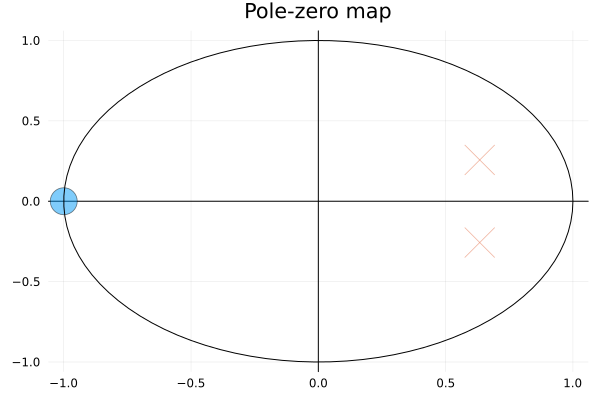

In [8]:
pzmap(Td)

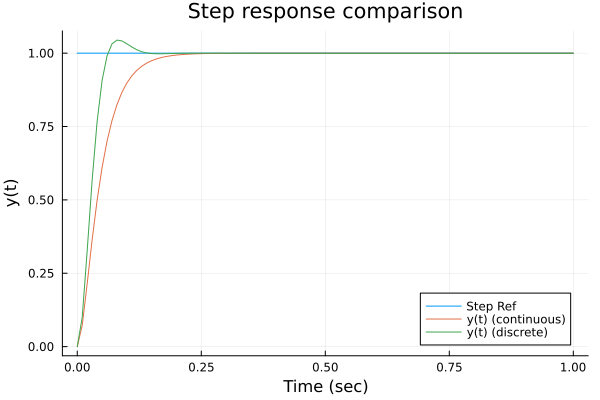

In [10]:
#Evaluate the step response for continuous vs. discrete models
begin
    tvec = collect(0:Ts:1)
    r = ones(size(tvec))
    L = C*P
    T = minreal(feedback(L))
    y,t,x = step(T, tvec)
    yd, td, xd = step(Td, tvec)
    plot(t,r,label="Step Ref")
    y = dropdims(y,dims=1)
    yd = dropdims(yd,dims=1)
    
    plot!(t,y, label="y(t) (continuous)", xlabel="Time (sec)", ylabel="y(t)",
    title="Step response comparison", legend=:bottomright)
    plot!(td,yd, label="y(t) (discrete)")
end

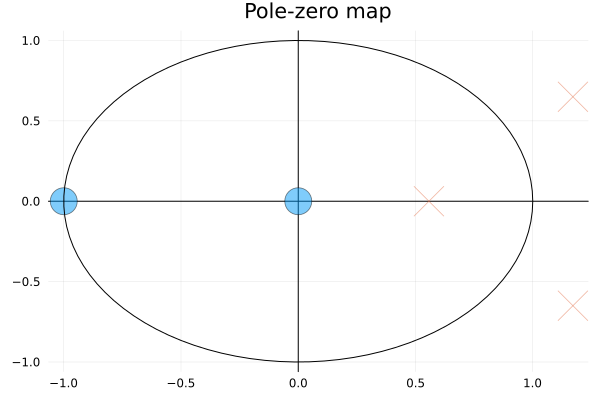

In [11]:
#When the pole and zero locations of controller is flipped
#the system loses closed-loop stability
begin
    C_bad = 20000 * (s+100)/(s+0.01)
    Cd_bad = c2d(C_bad, Ts)
    Ld_bad = Cd_bad*Pd
    Td_bad = minreal(feedback(Ld_bad))
    pzmap(Td_bad)
end

In [12]:
pole(Td_bad)
#Poles outside unit circle

3-element Vector{ComplexF64}:
  1.171284938604232 + 0.6498627735001148im
  1.171284938604232 - 0.6498627735001148im
 0.5572334660486593 + 0.0im